In [2]:
import torch
import torchvision
from torchvision import transforms, datasets

In [3]:
train = datasets.MNIST("", train = True, download = True,
                      transform = transforms.Compose([transforms.ToTensor()]))

test = datasets.MNIST("", train = False, download = True,
                      transform = transforms.Compose([transforms.ToTensor()]))

In [4]:
trainset = torch.utils.data.DataLoader(train, batch_size=10, shuffle=True)
testset = torch.utils.data.DataLoader(test, batch_size=10, shuffle=True)

In [5]:
import torch.nn as nn
import torch.nn.functional as F

In [6]:
class Net(nn.Module):
    
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28, 64)  # fully connected layer
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 32)
        self.fc4 = nn.Linear(32, 10)
        
    def forward(self, x):
        x = F.relu(self.fc1(x)) # nural net then relu
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        
        return F.log_softmax(x, dim=1)
        
        
        
net = Net()
print (net)

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=32, bias=True)
  (fc4): Linear(in_features=32, out_features=10, bias=True)
)


In [7]:
X = torch.rand((28, 28)) # random image
X = X.view(-1, 28*28) # -1 this input is of unknown shape even 1 works, match the input size of the network.

In [8]:
output = net(X)
print (output)

tensor([[-2.4172, -2.2625, -2.4674, -2.3601, -2.3909, -2.1450, -2.2625, -2.4436,
         -2.1182, -2.2282]], grad_fn=<LogSoftmaxBackward0>)


In [13]:
import torch.optim as optim

optimizer = optim.Adam(net.parameters(), lr=0.001)  #net.para = adjustable in the model, learning rate = size of the step to reduce the loss. 

epoch = 3

for e in range (epoch):  # learning , the whole loop is model.fit
    for data in trainset:
        
        X, y = data
        net.zero_grad() # zero it as it will go on adding for every epoch.
        output = net(X.view(-1, 28*28))  # passing to learn.                            
        loss = F.nll_loss(output, y)  # difference between output and ground truth
        loss.backward()  #backward pass
        optimizer.step()  #optimizing the loss
        
    print (loss)
        

tensor(0.1028, grad_fn=<NllLossBackward0>)
tensor(0.0077, grad_fn=<NllLossBackward0>)
tensor(0.2205, grad_fn=<NllLossBackward0>)


In [15]:
correct = 0
total = 0

with torch.no_grad():
    for data in trainset:
        X, y = data
        output = net(X.view(-1, 784))
        for idx, i in enumerate(output):
            if torch.argmax(i) == y[idx]:
                correct += 1
            total += 1

print ('acc', round(correct/total, 3))

acc 0.981


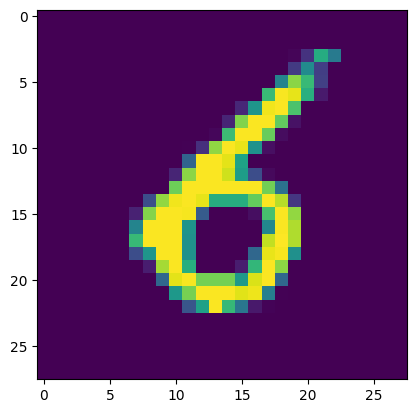

In [21]:
import matplotlib.pyplot as plt
plt.imshow(X[1].view(28,28))
plt.show()

In [20]:
print (torch.argmax(net(X[1].view(-1, 784))[0]))

tensor(6)


In [22]:
correct = 0
total = 0

with torch.no_grad():
    for data in testset:
        X, y = data
        output = net(X.view(-1, 784))
        for idx, i in enumerate(output):
            if torch.argmax(i) == y[idx]:
                correct += 1
            total += 1

print ('acc', round(correct/total, 3))

acc 0.969


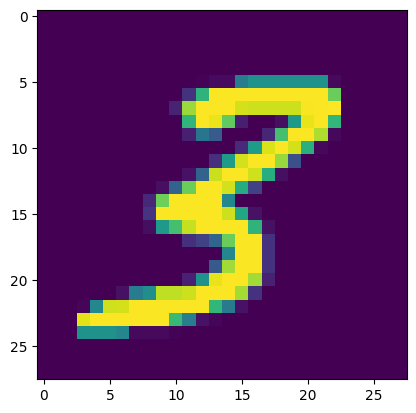

In [28]:
import matplotlib.pyplot as plt
plt.imshow(X[0].view(28,28))
plt.show()

In [27]:
print (torch.argmax(net(X[0].view(-1, 784))[0]))

tensor(3)
